<a href="https://colab.research.google.com/github/YugantGotmare/Deep_learning_project/blob/main/Heart_Disease_Using_Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [2]:
df = pd.read_csv('/content/heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df['target'].value_counts()

1    526
0    499
Name: target, dtype: int64

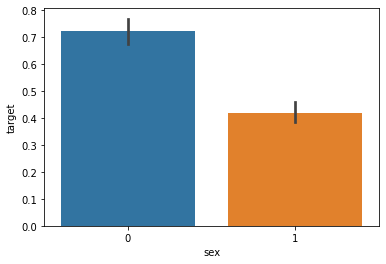

In [10]:
sns.barplot(x=df['sex'],y=df['target'])

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
x = df.drop(columns='target')
y = df['target']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [24]:
model = Sequential()

model.add(Dense(10, input_dim = 13, activation='relu'))
model.add(Dense(10, input_dim = 13, activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False
)

In [27]:
final_model = model.fit(x_train, y_train, batch_size=100,epochs=1000,verbose=1,validation_split=0.2,callbacks=callback)

Epoch 1/1000
7/7 [==============================] - 1s 33ms/step - loss: 17.2052 - accuracy: 0.5030 - val_loss: 13.0880 - val_accuracy: 0.4939
Epoch 2/1000
7/7 [==============================] - 0s 5ms/step - loss: 9.3990 - accuracy: 0.4726 - val_loss: 7.2136 - val_accuracy: 0.3902
Epoch 3/1000
7/7 [==============================] - 0s 5ms/step - loss: 6.1395 - accuracy: 0.4131 - val_loss: 7.1001 - val_accuracy: 0.3841
Epoch 4/1000
7/7 [==============================] - 0s 6ms/step - loss: 6.5507 - accuracy: 0.4223 - val_loss: 6.6907 - val_accuracy: 0.3902
Epoch 5/1000
7/7 [==============================] - 0s 8ms/step - loss: 5.6317 - accuracy: 0.4238 - val_loss: 5.7199 - val_accuracy: 0.3598
Epoch 6/1000
7/7 [==============================] - 0s 5ms/step - loss: 4.8704 - accuracy: 0.4024 - val_loss: 5.4294 - val_accuracy: 0.3720
Epoch 7/1000
7/7 [==============================] - 0s 8ms/step - loss: 4.5199 - accuracy: 0.4146 - val_loss: 4.8102 - val_accuracy: 0.3537
Epoch 8/1000
7/7 

In [28]:
y_pred = model.predict(x_test)

In [ ]:
y_pred

In [42]:
y_pred2 = np.where(y_pred>0.5,1,0)

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred2)

0.8439024390243902

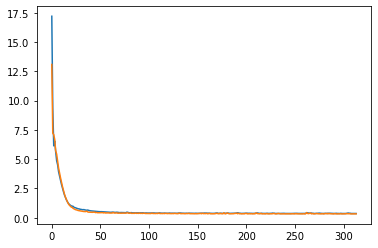

In [44]:
import matplotlib.pyplot as plt

plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])

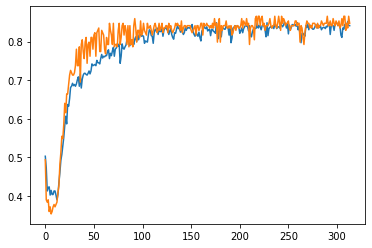

In [45]:
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])